100%|██████████| 100/100 [00:00<00:00, 457.03it/s]

Accuracy: 97.0
Mean episode length: 74.85
Last reward processor:
Estimated confusion matrix:


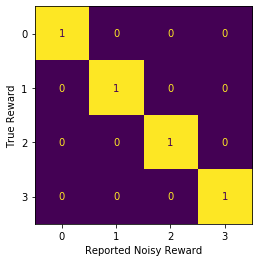

Reward sets:
(0, 0): [-3, -2, -3, -3, -3]
(0, 1): [-1, -3, -3, -2]
(0, 2): [-1, -2, 0, -1, -1, -1, -1, 0, 0, -1, -1, -3]
(0, 3): [0, 0, 0, 0, 0, -2, -2, 0, 0, 0, 0, -2, 0, 0, -1, 0, 0, -2, -1, 0, -1, -1, 0, 0, -2, -1, 0, 0, 0, -1, 0, 0, 0, 0]
(0, 4): [-2, -1, 0, -2, -2, -1]
(0, 5): [0, 0, -2, -2, -1, -2, -1, -3, -3, 0, -2]
(0, 6): [-3, -3]
Reward set counts:
Key (0, 0): 5 items
Key (0, 1): 4 items
Key (0, 2): 12 items
Key (0, 3): 34 items
Key (0, 4): 6 items
Key (0, 5): 11 items
Key (0, 6): 2 items


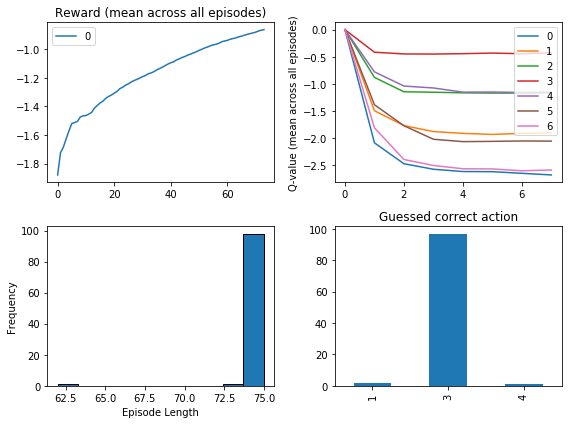

array([-2.682954, -1.907063, -1.166767, -0.427312, -1.153165, -2.058516,
       -2.592048])

In [3]:
import utils
from utils import *
from thompson_sampling_agent import ThompsonSamplingAgentTemporaryWrapper

# q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(learner=agent, params=params)
agent = ThompsonSamplingAgentTemporaryWrapper

params_new = {
    'max_steps': 75,
    'correct_action': 3,
    # # Runner parameters
    # 'max_steps': 1000,
    'num_episodes': 100,
    # 'convergence_consecutive_limit': 30,
    #
    'agent': agent,    
    }

params = default_params() | params_new
plot_mean_q_values(params=params)

# Mean reward might awkwardly drop, because most of the episodes end early

In [6]:
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)


100%|██████████| 1/1 [00:00<00:00, 208.15it/s]


In [ ]:
params_new = {
    'agent': agent,
    }

params = default_params() | params_new

q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
